### ML Modelinin Başarı Testi(AB Testi):

Yapacağım uygulama Vahit Keskin'in hocanın notlarından yararlanılmıştır. Verilerde değişiklik olabilir.

Uygulamada ilerleyebileceğimiz yol aşağıdaki gibidir;

- Hipotezler kurulacak,

- Bağımsız iki örneklem T testi varsayım kontrolü,

- Bağımsız iki örneklem T testi uygulaması,

- Nonparametrik bağımsız iki örneklem testi,

**Problem:** Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir il eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniliyor.

**Detaylar:** Model geliştirilmiş ve web sitesine entegre edilmiş.

-Site kullanıcıları belirli bir kurala göre ikiye bölünüyor.

-A grubu eski, B grubu yeni.

**Soru:** Gelir anlamında bir iş yapılıp yapılmadığı test edilmek isteniliyor?



**Hipotezler:** 

$H_0:\mu_1=\mu_2$

$H_1:\mu_1!=\mu_2$

In [1]:
import numpy as np
import pandas as pd

In [3]:
#Veri Tipi I
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B] ,axis=1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [4]:
#Veri Tipi II
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu

Grup_A = np.arange(len(A))
Grup_A = pd.DataFrame(Grup_A)
Grup_A[:] = "A"
A = pd.concat([A, Grup_A], axis = 1)

#B ve B'nin grubu

Grup_B = np.arange(len(B))
Grup_B = pd.DataFrame(Grup_B)
Grup_B[:] = "B"
B = pd.concat([B, Grup_B], axis = 1)

#Tüm Veri

AB = pd.concat([A,B])
AB.columns = ["gelir","Grup"]
print(AB.head())
print(AB.tail())

   gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


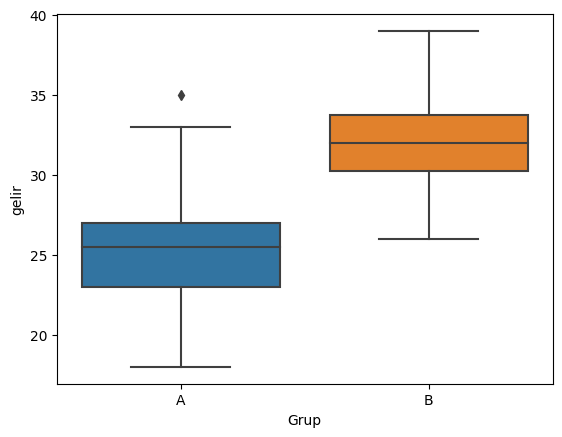

In [5]:
import seaborn as sns
sns.boxplot(x = "Grup", y = "gelir", data = AB);

In [6]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [7]:
AB.head()

,gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [8]:
#normallik varsayımı
from scipy.stats import shapiro

In [9]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [10]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

In [17]:
#Varyans homojen varsayımı
from scipy.stats import levene

scipy.stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [20]:
#Hipotez Testi
scipy.stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [22]:
#hipotez testinin daha açıklayıcı şekilde yazmak istersek;
test_istatistigi, pvalue = scipy.stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


In [25]:
#nonparametrik testi;
scipy.stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [27]:
#nonparametrik testinin daha açıklayıcı şekilde yazmak istersek;
test_istatistigi, pvalue = scipy.stats.mannwhitneyu(A_B["A"], A_B["B"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


**Not:** Nonparamterik testi normallik varsayımı ve varyans homojen varsayımı sağlanmaz ise kullanılır. Bizim uygulamada varsayımlar sağlanmıyor bu yüzden bzi kullandık.

**Yorum:** Hipotez testinin sonuçlarından ve nonparametrik testinin sonuçlarından anlaşılacağı üzere biz istatistiksel olarak fark var diyebiliriz. Bunun sebebi p-value değerinin alfa değerinden yani 0.05 değerinden küçüktür. Kısaca biz H0 hipotezini redderiz. 

@nursenabozdag